In [7]:
#Installed required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#if 1, reads results1 (surface rendering)
#if 2, reads results2 (volume rendering)
flag = 2

In [9]:
# Read dataset
df = pd.read_csv(r"results" + str(flag) +".csv", header = None)
df


,0,1,2
0,2,10,638.124345
1,3,10,235.331784
2,5,10,124.693076
3,9,10,107.931495


In [10]:
# Fix formatting
df.columns = ['Processes','Viewpoints','Time']
df = df.sort_values(by='Processes')
df['Processes'] = df['Processes'] - 1
df['Processes'] = df['Processes'].astype(str)
df

,Processes,Viewpoints,Time
0,1,10,638.124345
1,2,10,235.331784
2,4,10,124.693076
3,8,10,107.931495


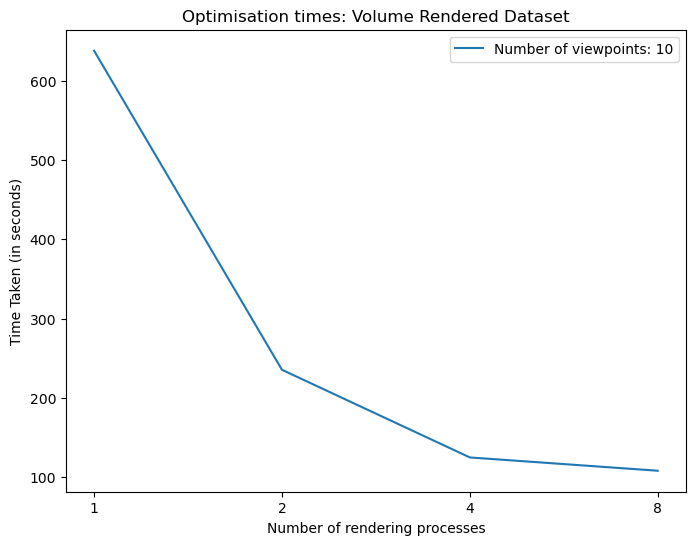

In [11]:
#Group by viewpoint count
splitdfs = df.groupby('Viewpoints')

# Create plots for each viewpoint count
plt.figure(figsize=(8, 6))
for viewc, minidf in splitdfs:
    plt.plot(minidf['Processes'], minidf['Time'], label=f'Number of viewpoints: {viewc}')

plt.xlabel('Number of rendering processes')
plt.ylabel('Time Taken (in seconds)')
if (flag == 1):
    plt.title("Optimisation times: Surface Rendered Dataset")
elif (flag == 2):
    plt.title("Optimisation times: Volume Rendered Dataset")
plt.legend()
plt.savefig('opt_times' + str(flag) + '.png')
plt.show()

/var/folders/nk/4vdw1qzn7mx0fz0nvty2lngw0000gn/T/ipykernel_17218/2534143423.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minidf['Time'] = base['Time']/(minidf['Time']*minidf['Processes'].astype(int))


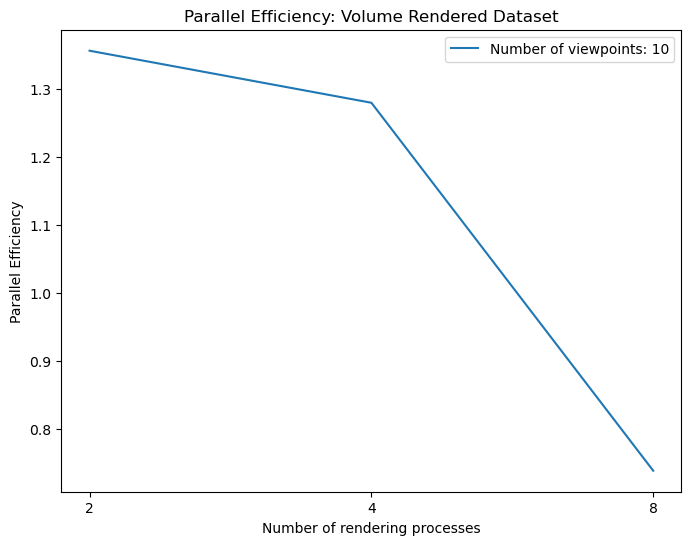

In [12]:
#Parallel efficiency graph

#Group by viewpoint count
splitdfs = df.groupby('Viewpoints')

# Create plots for each viewpoint count
plt.figure(figsize=(8, 6))
for viewc, minidf in splitdfs:
    base = minidf[minidf['Processes'] == '1'].iloc[0]
    #print(base)
    minidf = minidf[minidf['Processes'] != '1']
    minidf['Time'] = base['Time']/(minidf['Time']*minidf['Processes'].astype(int))
    plt.plot(minidf['Processes'], minidf['Time'], label=f'Number of viewpoints: {viewc}')

plt.xlabel('Number of rendering processes')
plt.ylabel('Parallel Efficiency')
if (flag == 1):
    plt.title("Parallel Efficiency: Surface Rendered Dataset")
elif (flag == 2):
    plt.title("Parallel Efficiency: Volume Rendered Dataset")
plt.legend()
plt.savefig('eff' + str(flag) + '.png')
plt.show()